In [16]:
import matplotlib.pyplot as plt
import cartesian_explorer as caex
import xarray
import numpy as np

In [9]:
def get_colors(n=2, cm=plt.cm.gnuplot2):
    edge_shift = .24
    cvals =  [x/(n-1) for x in range(n)]
    return [cm(x*(1-2*edge_shift) + edge_shift) for x in cvals]

In [62]:
colors = get_colors(len(data.p))

In [63]:
def plot_with_band(x, y, band_alpha=0.1, **kwargs):
    mean = np.mean(y, -1)
    std = np.std(y, -1)
    plt.plot(x, mean, **kwargs)
    kwargs.pop('alpha', None)
    kwargs.pop('marker', None)
    plt.fill_between(x, mean+std, mean-std, alpha=band_alpha, **kwargs)

In [64]:
plt.rcParams['font.size'] = 14

In [73]:
data = xarray.open_dataarray('../data/energy_max_tw.nc')

In [74]:
data.dims

('p', 'N', 'seed')

In [75]:
data.sel(p=1)

<xarray.DataArray (N: 18, seed: 16)>
array([[4, 5, 4, ..., 4, 5, 4],
       [4, 5, 3, ..., 3, 4, 3],
       [4, 4, 4, ..., 4, 4, 4],
       ...,
       [4, 4, 3, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 3, 4, 4]], dtype=int32)
Coordinates:
  * N        (N) int32 10 14 20 26 34 42 52 62 ... 114 130 156 180 230 400 1000
  * seed     (seed) int32 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
    p        int32 1

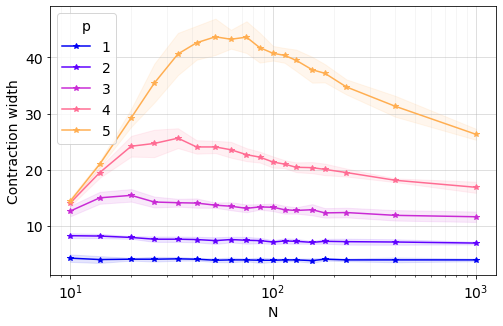

In [76]:
fig = plt.figure(figsize=(8,8/1.618))
for i, p in enumerate(data.p):
    c = colors[i]
    plot_with_band(data.N, data.sel(p=p),
                   label=fr'p={str}', color=c, marker='*'
                  )
    
plt.legend(range(1, len(data.p)+1), title=r'p')
plt.xlabel('N')
plt.ylabel('Contraction width')
plt.xscale('log')
plt.grid(which='major', alpha=0.5)
plt.grid(which='minor', alpha=0.15)
plt.savefig('./pdf/energy_max_tw.pdf')